In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
stock_data = yf.download('AAPL', start='2025-01-01')
stock_data.head(10)

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2025-01-02,243.263199,248.500565,241.238085,248.330961,55740700
2025-01-03,242.774368,243.592387,241.307905,242.774368,40244100
2025-01-06,244.410416,246.734810,242.614744,243.722074,45045600
2025-01-07,241.627136,244.959095,240.769205,242.395272,40856000
2025-01-08,242.115952,243.123531,239.472335,241.337830,37628900
2025-01-10,236.280045,239.582077,232.439303,239.432429,61710900
2025-01-13,233.835922,234.105277,229.167192,232.968021,49630700
2025-01-14,232.718613,235.551775,231.910564,234.185076,39435300


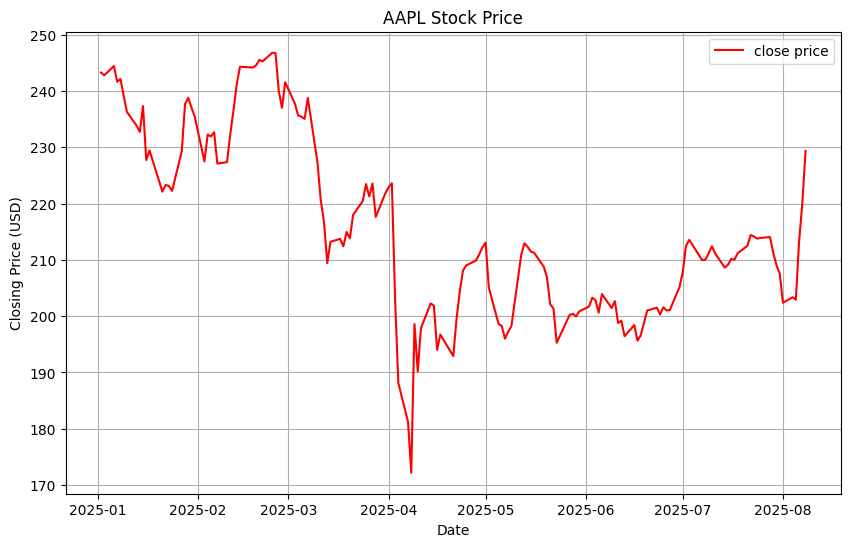

In [3]:
plt.figure(figsize=(10, 6))
plt.plot(stock_data.index, stock_data['Close'],label = 'close price', color = 'red')
plt.title('AAPL Stock Price')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

# Classical Time Series Decomposition

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition_a = seasonal_decompose(stock_data['Close'], model='additive', period = 30)

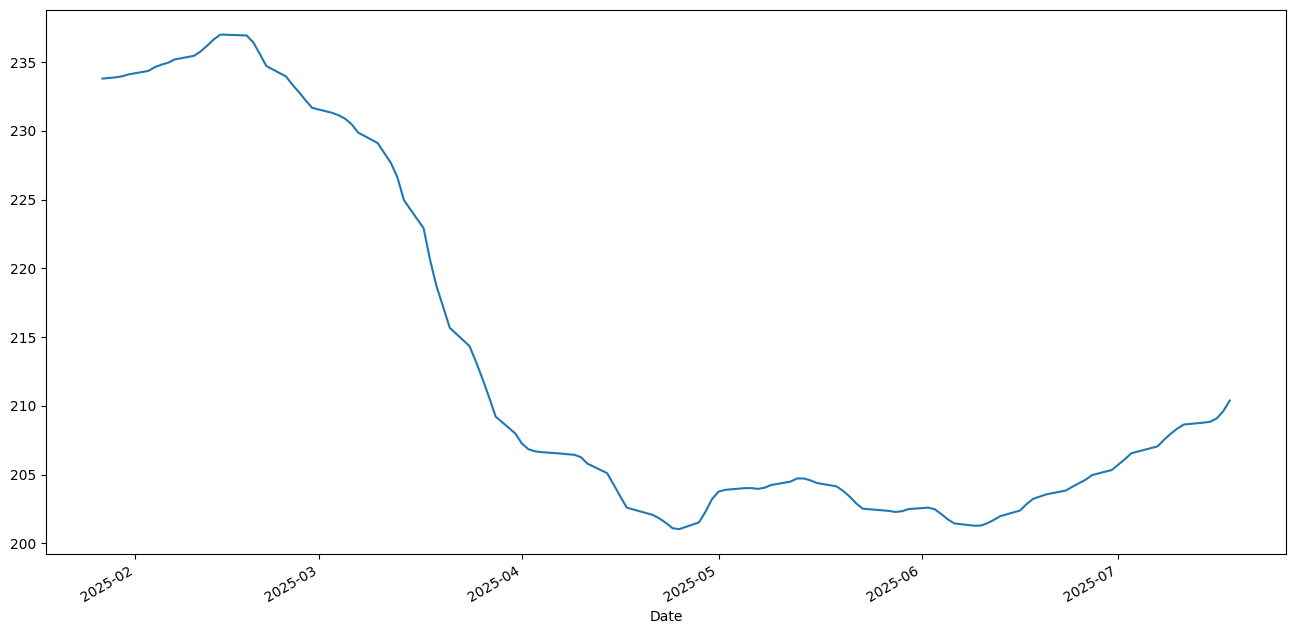

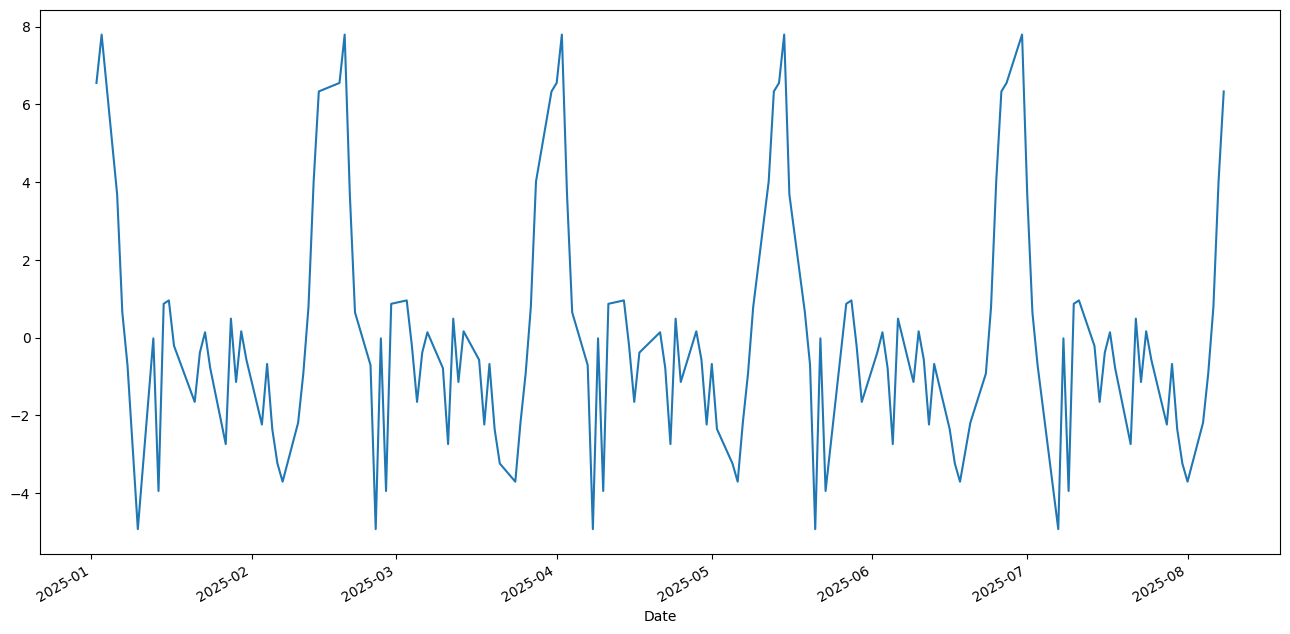

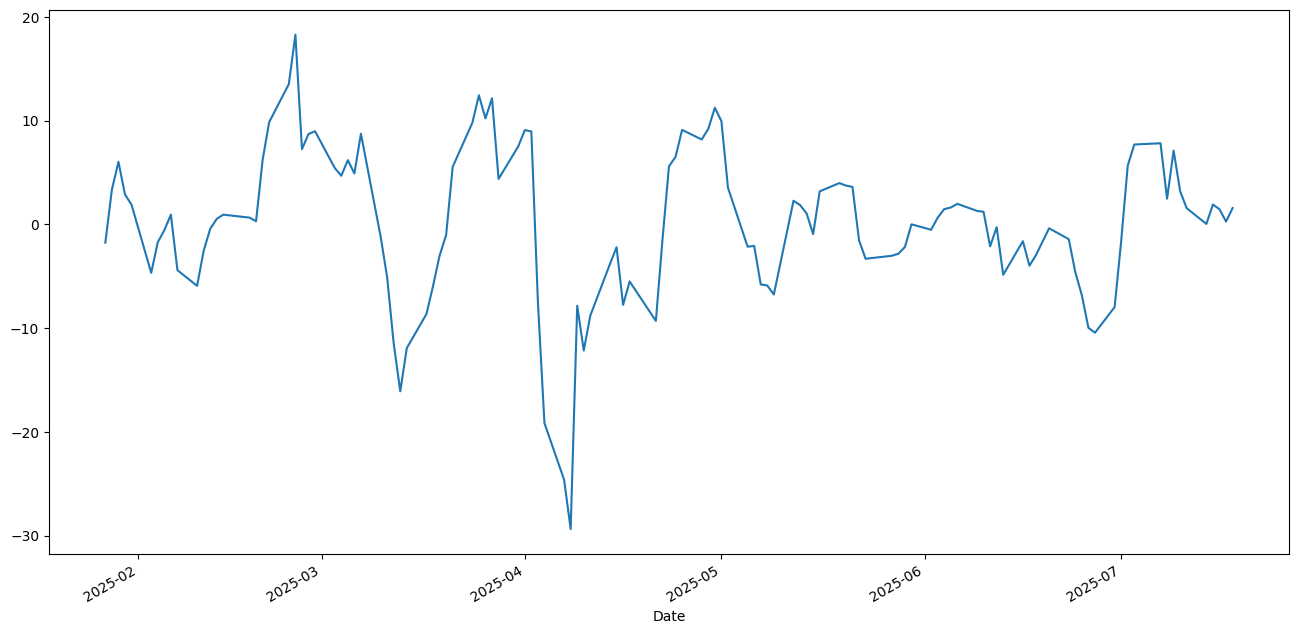

In [5]:
trend_a = decomposition_a.trend
seasonal_a = decomposition_a.seasonal
residual_a = decomposition_a.resid

trend_a.plot(figsize=(16, 8))
plt.show()
seasonal_a.plot(figsize=(16, 8))
plt.show()
residual_a.plot(figsize=(16, 8))
plt.show()
#

# STL Decomposition

In [6]:
from statsmodels.tsa.seasonal import STL

In [7]:
stl = STL(stock_data['Close'], period = 30)
res = stl.fit()

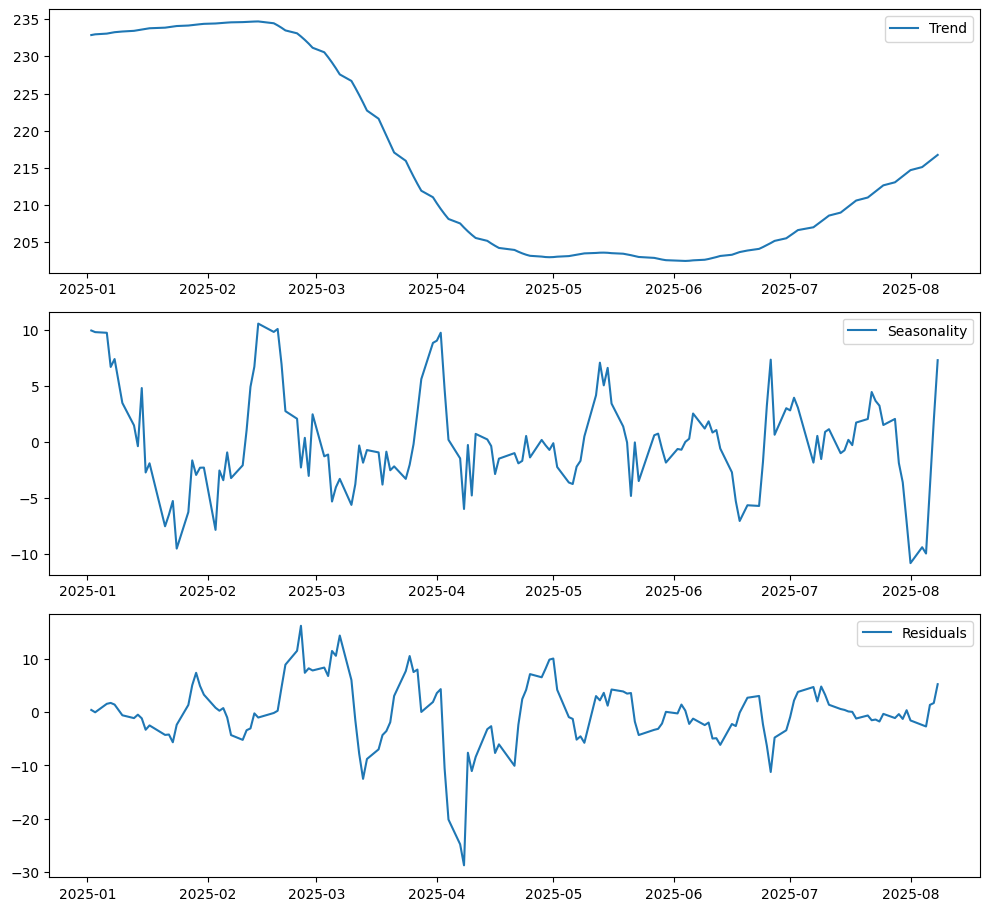

In [8]:
plt.figure(figsize=(10, 12))
plt.subplot(4, 1, 1)
plt.plot(res.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(4, 1, 2)
plt.plot(res.seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(4, 1, 3)
plt.plot(res.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [9]:
from statsmodels.tsa.stattools import adfuller

adfuller_result = adfuller(stock_data['Close'])
print(f'ADF Statistic: {round(adfuller_result[0], 3)}')
print(f'p-value: {round(adfuller_result[1], 3)}')
print(f'Critical Values:')
for key, value in adfuller_result[4].items():
    print(f'{key}: {round(value, 3)}')

ADF Statistic: -2.201
p-value: 0.206
Critical Values:
1%: -3.476
5%: -2.882
10%: -2.578


In [13]:
from statsmodels.tsa.stattools import kpss

kpss_result = kpss(stock_data['Close'], regression = 'ct')
print(f'KPSS Statistic: {round(kpss_result[0], 3)}')
print(f'p-value: {round(kpss_result[1], 3)}')
print(f'Critical Values:')
for key, value in kpss_result[3].items():
    print(f'{key}: {round(value, 3)}')

KPSS Statistic: 0.278
p-value: 0.01
Critical Values:
10%: 0.119
5%: 0.146
2.5%: 0.176
1%: 0.216


/tmp/ipython-input-1528190116.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(stock_data['Close'], regression = 'ct')


In [14]:
import numpy as np
from scipy.stats import kstest, ks_2samp

np.random.seed(0)
n = 500

strict_stationarity_series = np.random.normal(0, 1, n)

non_strict_stationarity_series = np.concatenate([
    np.random.normal(0, 1, n // 2),
    np.random.normal(1, 1, n // 2)
])

def ks_test_stationarity(series):
  split = len(series)//2
  series_first_half = series[:split]
  series_second_half = series[split:]
  return ks_2samp(series_first_half, series_second_half) #stat, p-value

print(ks_test_stationarity(strict_stationarity_series))

KstestResult(statistic=np.float64(0.068), pvalue=np.float64(0.6109101078019121), statistic_location=np.float64(0.8801789120807822), statistic_sign=np.int8(-1))


In [15]:
ks_stat_strict, ks_pvalue_strict = ks_test_stationarity(strict_stationarity_series)
ks_stat_non_strict, ks_pvalue_non_strict = ks_test_stationarity(non_strict_stationarity_series)

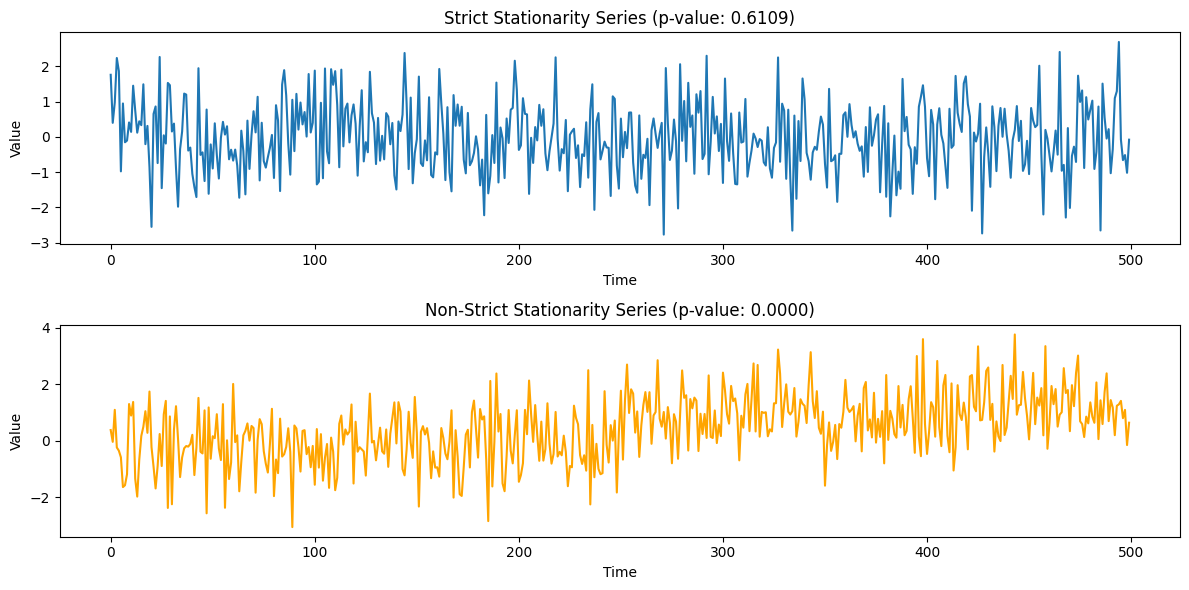

In [19]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(strict_stationarity_series)
plt.title(f'Strict Stationarity Series (p-value: {ks_pvalue_strict:.4f})')
plt.xlabel('Time')
plt.ylabel('Value')

plt.subplot(2, 1, 2)
plt.plot(non_strict_stationarity_series, color='orange')
plt.title(f'Non-Strict Stationarity Series (p-value: {ks_pvalue_non_strict:.4f})')
plt.xlabel('Time')
plt.ylabel('Value')

plt.tight_layout()
plt.show()